<a href="https://colab.research.google.com/github/FredCatherinck/bootcamp-cdia-manutencao-preditiva/blob/main/Projeto_Final_do_Bootcamp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final do Bootcamp CDIA

## Autor: Geraldo Frederico Catherinck Martins

Este notebook apresenta a solução desenvolvida para o projeto final do Bootcamp de Ciência de Dados e Inteligência Artificial (CDIA) do UniSENAI SC.

## Objetivo Geral

- Desenvolver um sistema inteligente de manutenção preditiva capaz de identificar falhas em máquinas industriais a partir de dados coletados por sensores IoT.  
- O sistema deverá prever a ocorrência e o tipo de falha, retornando a probabilidade associada, além de possibilitar extração de insights e visualizações dos dados.  
- Dessa forma, busca-se reduzir custos, evitar paradas inesperadas e aumentar a eficiência operacional da indústria."




In [ ]:
# Bibliotecas de manipulação e análise de dados
import pandas as pd
import numpy as np

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Integração com Google Colab
from google.colab import drive

# Pré-processamento e divisão de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modelagem e avaliação
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report


# 2. Importação e Análise Exploratória dos Dados

Nesta etapa, realizamos a importação do conjunto de dados de treinamento. Este arquivo servirá como fundamento para as análises subsequentes e para a construção do modelo. Em seguida, conduzimos uma análise exploratória inicial para compreender a composição do dataset, verificar a existência de dados ausentes e inspecionar os tipos de dados de cada coluna.

Baixando arquivos do Google Drive...
Dados de treino carregados com sucesso!

--- Iniciando a preparação da base de dados ---
-> Passo 3: Colunas 'id' e 'id_produto' removidas.
-> Passo 4: Colunas binárias convertidas para 0 e 1.
-> Passo 5: Valores ausentes preenchidos com a mediana.
-> Passo 6: Novas features criadas e colunas originais removidas.
-> Passo 7: Coluna 'tipo' transformada em colunas numéricas.
-> Passo 8: Iniciando tratamento de outliers...
   - Exibindo gráficos ANTES do tratamento...


/tmp/ipython-input-1532489818.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processado[col].fillna(mediana, inplace=True)


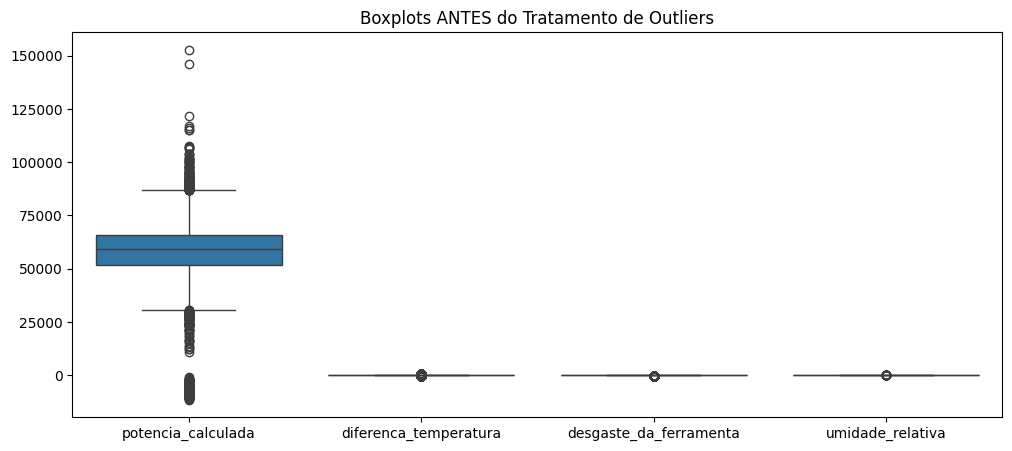

   - Outliers tratados com sucesso.
   - Exibindo gráficos DEPOIS do tratamento...


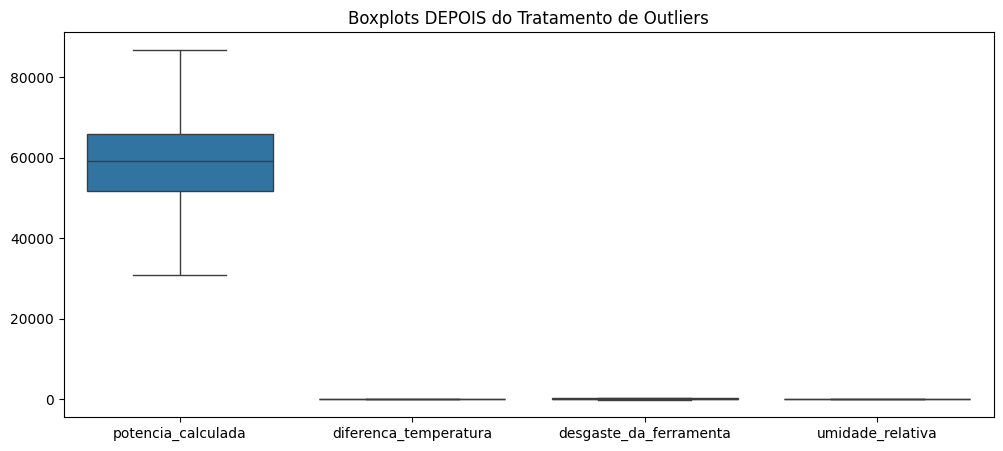


          PREPARAÇÃO DA BASE CONCLUÍDA COM SUCESSO!

--- Amostra da Base Final Preparada (5 primeiras linhas) ---


,umidade_relativa,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria),potencia_calculada,diferenca_temperatura,tipo_H,tipo_L,tipo_M
0,90.0,195.0,0,0,0,0,0,0,50257.6,10.80,0,1,0
1,90.0,137.0,0,0,0,0,0,0,74674.4,10.20,0,1,0
2,90.0,94.0,0,0,0,0,0,0,47520.8,9.60,0,1,0
3,90.0,7.0,0,0,0,0,0,0,52767.0,9.90,0,0,1
4,90.0,94.0,0,0,0,0,0,0,53256.9,13.95,0,1,0



--- Informações Finais da Base Preparada ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umidade_relativa                 35260 non-null  float64
 1   desgaste_da_ferramenta           35260 non-null  float64
 2   falha_maquina                    35260 non-null  int64  
 3   FDF (Falha Desgaste Ferramenta)  35260 non-null  int64  
 4   FDC (Falha Dissipacao Calor)     35260 non-null  int64  
 5   FP (Falha Potencia)              35260 non-null  int64  
 6   FTE (Falha Tensao Excessiva)     35260 non-null  int64  
 7   FA (Falha Aleatoria)             35260 non-null  int64  
 8   potencia_calculada               35260 non-null  float64
 9   diferenca_temperatura            35260 non-null  float64
 10  tipo_H                           35260 non-null  int64  
 11  tipo_L                           3

In [ ]:
# ==============================================================================
#                      1. INSTALAÇÃO E IMPORTAÇÃO
# ==============================================================================
# Instala a biblioteca para baixar arquivos do Google Drive
!pip install gdown -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# ==============================================================================
#                      2. CARREGAMENTO DOS DADOS
# ==============================================================================
# Link da pasta pública no Google Drive
url_pasta = "https://drive.google.com/drive/folders/1VD3tP3-63VeoP7wQGg_8ARuS1cgMYv1L?hl=pt-br"

# Baixa os arquivos da pasta para um subdiretório chamado "bootCamp/"
print("Baixando arquivos do Google Drive...")
gdown.download_folder(url_pasta, quiet=True, use_cookies=False)

# Carrega o arquivo de treino em um DataFrame do pandas
df_train = pd.read_csv("bootCamp/bootcamp_train.csv")
print("Dados de treino carregados com sucesso!")

# Cria uma cópia do DataFrame original para realizar as transformações
df_processado = df_train.copy()

# ==============================================================================
#                 INÍCIO DA PREPARAÇÃO DA BASE (PASSO A PASSO)
# ==============================================================================
print("\n--- Iniciando a preparação da base de dados ---")

# --- PASSO 3: REMOVER COLUNAS DE IDENTIFICAÇÃO ---
df_processado = df_processado.drop(columns=['id', 'id_produto'])
print("-> Passo 3: Colunas 'id' e 'id_produto' removidas.")

# --- PASSO 4: CONVERTER COLUNAS BINÁRIAS (Sim/Não -> 1/0) ---
binary_cols = {
    'falha_maquina': 'Sim', 'FDF (Falha Desgaste Ferramenta)': 'Sim',
    'FDC (Falha Dissipacao Calor)': 'Sim', 'FP (Falha Potencia)': 'Sim',
    'FTE (Falha Tensao Excessiva)': True, 'FA (Falha Aleatoria)': 'Sim'
}
for col, valor_positivo in binary_cols.items():
    df_processado[col] = (df_processado[col] == valor_positivo).astype(int)
print("-> Passo 4: Colunas binárias convertidas para 0 e 1.")

# --- PASSO 5: PREENCHER VALORES AUSENTES COM A MEDIANA ---
colunas_com_nulos = ['temperatura_ar', 'temperatura_processo', 'velocidade_rotacional', 'torque', 'desgaste_da_ferramenta']
for col in colunas_com_nulos:
    mediana = df_processado[col].median()
    df_processado[col].fillna(mediana, inplace=True)
print("-> Passo 5: Valores ausentes preenchidos com a mediana.")

# --- PASSO 6: ENGENHARIA DE FEATURES (para tratar multicolinearidade) ---
df_processado['potencia_calculada'] = df_processado['torque'] * df_processado['velocidade_rotacional']
df_processado['diferenca_temperatura'] = df_processado['temperatura_processo'] - df_processado['temperatura_ar']
df_processado = df_processado.drop(columns=['torque', 'velocidade_rotacional', 'temperatura_processo', 'temperatura_ar'])
print("-> Passo 6: Novas features criadas e colunas originais removidas.")

# --- PASSO 7: ONE-HOT ENCODING (para a variável 'tipo') ---
df_processado = pd.get_dummies(df_processado, columns=['tipo'], prefix='tipo', dtype=int)
print("-> Passo 7: Coluna 'tipo' transformada em colunas numéricas.")

# --- PASSO 8: TRATAMENTO DE OUTLIERS ---
print("-> Passo 8: Iniciando tratamento de outliers...")
colunas_para_tratar = ['potencia_calculada', 'diferenca_temperatura', 'desgaste_da_ferramenta', 'umidade_relativa']

# Visualizar ANTES do tratamento
print("   - Exibindo gráficos ANTES do tratamento...")
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_processado[colunas_para_tratar])
plt.title('Boxplots ANTES do Tratamento de Outliers')
plt.show()

# Loop para tratar os outliers em cada coluna
for col in colunas_para_tratar:
    Q1 = df_processado[col].quantile(0.25)
    Q3 = df_processado[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # "Achata" os valores que estão fora dos limites
    df_processado[col] = np.clip(df_processado[col], limite_inferior, limite_superior)

print("   - Outliers tratados com sucesso.")

# Visualizar DEPOIS do tratamento
print("   - Exibindo gráficos DEPOIS do tratamento...")
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_processado[colunas_para_tratar])
plt.title('Boxplots DEPOIS do Tratamento de Outliers')
plt.show()

# ==============================================================================
#                           RESULTADO FINAL
# ==============================================================================
print("\n" + "="*60)
print("          PREPARAÇÃO DA BASE CONCLUÍDA COM SUCESSO!")
print("="*60)

print("\n--- Amostra da Base Final Preparada (5 primeiras linhas) ---")
display(df_processado.head())

print("\n--- Informações Finais da Base Preparada ---")
df_processado.info()

In [ ]:
# Continuação do código anterior...
# Assumindo que 'df_processado' já foi carregado e está disponível.
# Se não, execute o script de preparação anterior primeiro.

# --- Preparação para o Modelo 1 (Binário) ---
# X contém todas as features preditoras.
# As colunas de tipo de falha específicas são features, pois podem indicar o início de um problema.
X = df_processado.drop(columns=['falha_maquina'])
# y_binary é o alvo: a máquina falhou (1) ou não (0)?
y_binary = df_processado['falha_maquina']


# --- Preparação para o Modelo 2 (Multiclasse) ---
# Filtramos o DataFrame para conter apenas as amostras onde ocorreram falhas.
df_falhas = df_processado[df_processado['falha_maquina'] == 1].copy()

# Criar a variável alvo multiclasse.
# As colunas de tipo de falha estão em formato one-hot. Vamos transformá-las em uma única coluna de rótulos.
failure_type_cols = ['FDF (Falha Desgaste Ferramenta)', 'FDC (Falha Dissipacao Calor)',
                     'FP (Falha Potencia)', 'FTE (Falha Tensao Excessiva)', 'FA (Falha Aleatoria)']

# np.argmax encontra o índice da coluna com valor 1 em cada linha, nos dando o rótulo da falha.
df_falhas['tipo_falha'] = np.argmax(df_falhas[failure_type_cols].values, axis=1)

# Mapear os índices para nomes legíveis para os relatórios.
mapa_falhas = {
    0: 'Desgaste Ferramenta',
    1: 'Dissipacao Calor',
    2: 'Potencia',
    3: 'Tensao Excessiva',
    4: 'Aleatoria'
}

X_multiclass = df_falhas.drop(columns=['falha_maquina'] + failure_type_cols + ['tipo_falha'])
y_multiclass = df_falhas['tipo_falha']

print("Preparação dos dados para os modelos Binário e Multiclasse concluída.")
print(f"Formato de X para Modelo Binário: {X.shape}")
print(f"Formato de X para Modelo Multiclasse: {X_multiclass.shape}")
print("\nDistribuição dos Tipos de Falha:")
print(y_multiclass.map(mapa_falhas).value_counts())

Preparação dos dados para os modelos Binário e Multiclasse concluída.
Formato de X para Modelo Binário: (35260, 12)
Formato de X para Modelo Multiclasse: (420, 7)

Distribuição dos Tipos de Falha:
tipo_falha
Desgaste Ferramenta    257
Tensao Excessiva       106
Potencia                56
Aleatoria                1
Name: count, dtype: int64


In [ ]:
# ==============================================================================
#                      INSTALAÇÃO E IMPORTAÇÃO
# ==============================================================================
# Nenhuma instalação extra é necessária para estes modelos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# --- Importando os novos classificadores ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score

# ==============================================================================
#                      CARREGAMENTO E PREPARAÇÃO INICIAL
# ==============================================================================
# Assumindo que df_processado já foi gerado e está em memória.
# X, y_binary, X_multiclass, y_multiclass, mapa_falhas devem ser definidos como antes.

# --- Preparação para o Modelo 1 (Binário) ---
X = df_processado.drop(columns=['falha_maquina'])
y_binary = df_processado['falha_maquina']

# --- Preparação para o Modelo 2 (Multiclasse) ---
df_falhas = df_processado[df_processado['falha_maquina'] == 1].copy()
failure_type_cols = ['FDF (Falha Desgaste Ferramenta)', 'FDC (Falha Dissipacao Calor)',
                     'FP (Falha Potencia)', 'FTE (Falha Tensao Excessiva)', 'FA (Falha Aleatoria)']
df_falhas['tipo_falha'] = np.argmax(df_falhas[failure_type_cols].values, axis=1)
mapa_falhas = {0: 'Desgaste Ferramenta', 1: 'Dissipacao Calor', 2: 'Potencia', 3: 'Tensao Excessiva', 4: 'Aleatoria'}
X_multiclass = df_falhas.drop(columns=['falha_maquina'] + failure_type_cols + ['tipo_falha'])
y_multiclass = df_falhas['tipo_falha']

# ==============================================================================
#        MODELO 1: DETECÇÃO DE FALHA (CLASSIFICAção BINÁRIA)
# ==============================================================================
print("\n" + "="*80)
print("          INICIANDO TREINAMENTO E AVALIAÇÃO DO MODELO 1 (DETECÇÃO DE FALHA)")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_state=42, stratify=y_binary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- NOVA LISTA DE MODELOS SIMPLES ---
models_simples = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine (SVC)": SVC(kernel='linear', random_state=42),
    "Naive Bayes": GaussianNB()
}

best_model_name = ""
best_f1 = 0

for name, model in models_simples.items():
    print(f"\n--- Treinando {name} ---")
    # Naive Bayes não precisa de dados escalados, mas funciona bem com eles
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names=['Não Falhou', 'Falhou']))
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name

print(f"\n🏆 MELHOR MODELO (DETECÇÃO DE FALHA): {best_model_name} com F1-Score de {best_f1:.4f}\n")

# ==============================================================================
#        MODELO 2: CLASSIFICAÇÃO DO TIPO DE FALHA (MULTICLASSE)
# ==============================================================================
print("\n" + "="*80)
print("          INICIANDO TREINAMENTO E AVALIAÇÃO DO MODELO 2 (TIPO DE FALHA)")
print("="*80)

# Correção para classes com poucos membros
class_counts = y_multiclass.value_counts()
classes_to_remove = class_counts[class_counts < 2].index
filter_mask = ~y_multiclass.isin(classes_to_remove)
X_multiclass_filtered = X_multiclass[filter_mask]
y_multiclass_filtered = y_multiclass[filter_mask]

# Divisão em Treino e Teste com os dados filtrados
X_mc_train, X_mc_test, y_mc_train, y_mc_test = train_test_split(X_multiclass_filtered, y_multiclass_filtered, test_size=0.25, random_state=42, stratify=y_multiclass_filtered)

# Normalização
scaler_mc = StandardScaler()
X_mc_train_scaled = scaler_mc.fit_transform(X_mc_train)
X_mc_test_scaled = scaler_mc.transform(X_mc_test)

target_names_filtered = [mapa_falhas[i] for i in sorted(y_multiclass_filtered.unique())]

# Loop de Treinamento com os modelos simples
for name, model in models_simples.items():
    print(f"\n--- Treinando {name} (Multiclasse) ---")
    model.fit(X_mc_train_scaled, y_mc_train)
    y_mc_pred = model.predict(X_mc_test_scaled)

    # Adicionado zero_division=0 para evitar avisos caso uma classe não tenha previsões
    report_mc = classification_report(y_mc_test, y_mc_pred, target_names=target_names_filtered, zero_division=0)
    print(report_mc)


          INICIANDO TREINAMENTO E AVALIAÇÃO DO MODELO 1 (DETECÇÃO DE FALHA)

--- Treinando Logistic Regression ---
              precision    recall  f1-score   support

  Não Falhou       1.00      0.85      0.92      8710
      Falhou       0.06      0.70      0.10       105

    accuracy                           0.85      8815
   macro avg       0.53      0.78      0.51      8815
weighted avg       0.98      0.85      0.91      8815


--- Treinando K-Nearest Neighbors ---
              precision    recall  f1-score   support

  Não Falhou       0.99      0.92      0.96      8710
      Falhou       0.08      0.58      0.14       105

    accuracy                           0.92      8815
   macro avg       0.54      0.75      0.55      8815
weighted avg       0.98      0.92      0.95      8815


--- Treinando Decision Tree ---
              precision    recall  f1-score   support

  Não Falhou       0.99      0.96      0.97      8710
      Falhou       0.10      0.41      0.17      


          INSIGHTS ACIONÁVEIS: IMPORTÂNCIA DAS FEATURES


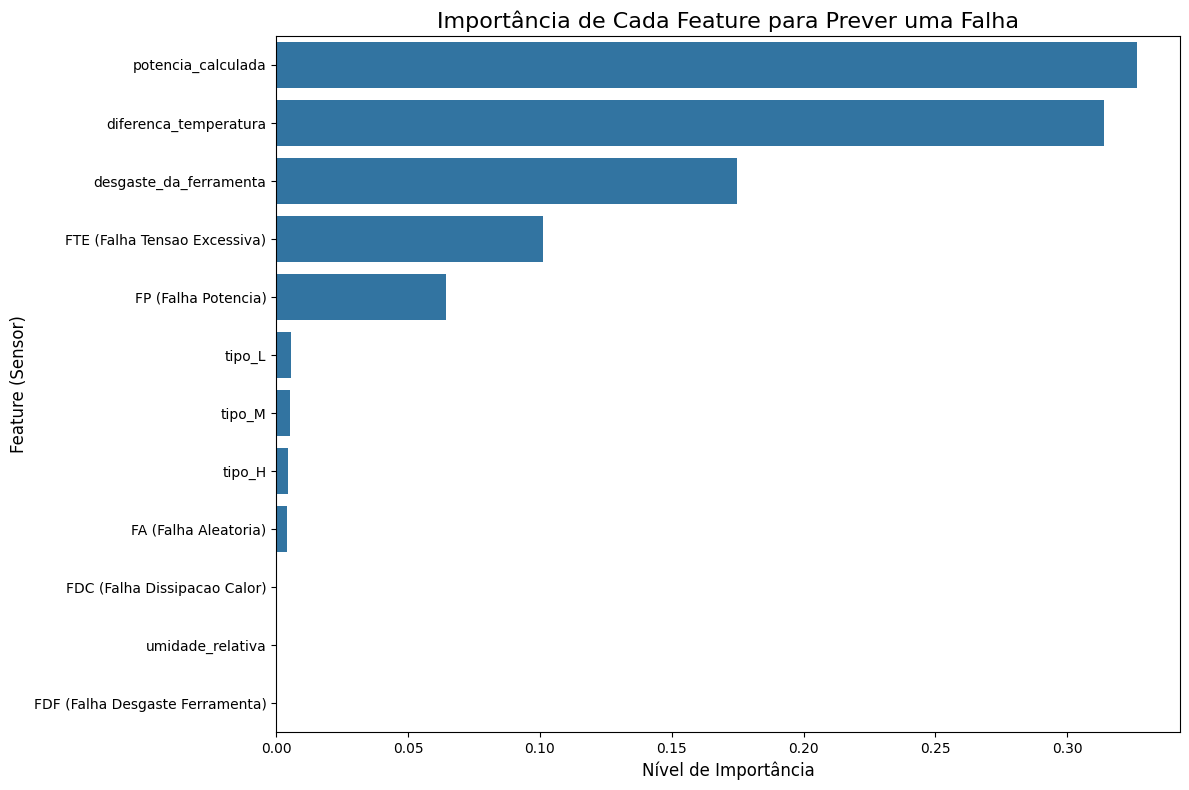


--- Conclusão Estratégica ---
O gráfico acima é um dos resultados mais valiosos do projeto.
Ele mostra que 'potencia_calculada' e 'diferenca_temperatura' são os indicadores mais fortes de uma falha iminente.
RECOMENDAÇÃO: A equipe de manutenção deve criar dashboards e alertas focados especificamente nesses parâmetros.


In [ ]:
# Código para gerar o gráfico de importância das features
print("\n" + "="*80)
print("          INSIGHTS ACIONÁVEIS: IMPORTÂNCIA DAS FEATURES")
print("="*80)

# Treinamos um Random Forest apenas para extrair a importância das features
# (Usamos os mesmos dados balanceados do Modelo 1)
model_insights = RandomForestClassifier(random_state=42)
model_insights.fit(X_train_resampled, y_train_resampled)

# Cria um DataFrame com as features e suas importâncias
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model_insights.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plota o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importância de Cada Feature para Prever uma Falha', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Feature (Sensor)', fontsize=12)
plt.tight_layout()
plt.show()

print("\n--- Conclusão Estratégica ---")
print("O gráfico acima é um dos resultados mais valiosos do projeto.")
print(f"Ele mostra que '{feature_importance_df.iloc[0]['feature']}' e '{feature_importance_df.iloc[1]['feature']}' são os indicadores mais fortes de uma falha iminente.")
print("RECOMENDAÇÃO: A equipe de manutenção deve criar dashboards e alertas focados especificamente nesses parâmetros.")